In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('combined_data_aqi.csv')
data

,lon,lat,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,dt
0,97.0253,4.3685,1,263.69,0.01,1.34,9.12,0.21,3.84,4.41,1.84,1706540400
1,97.0253,4.3685,1,257.02,0.03,1.52,6.79,0.24,3.80,4.49,2.53,1706544000
2,97.0253,4.3685,1,253.68,0.02,1.61,6.71,0.27,3.82,4.52,3.39,1706547600
3,97.0253,4.3685,1,253.68,0.01,1.59,8.67,0.27,3.87,4.57,4.37,1706551200
4,97.0253,4.3685,1,257.02,0.00,1.50,10.91,0.25,3.82,4.52,4.94,1706554800
...,...,...,...,...,...,...,...,...,...,...,...,...
206875,99.3812,2.1924,1,223.64,0.02,1.17,20.56,1.31,1.10,1.61,0.66,1730196000
206876,99.3812,2.1924,1,240.33,0.01,1.78,17.17,1.30,1.22,1.98,0.71,1730199600
206877,99.3812,2.1924,1,260.35,0.00,2.57,13.59,1.31,1.52,2.62,0.74,1730203200
206878,99.3812,2.1924,1,270.37,0.00,2.70,11.27,1.25,1.91,3.41,0.79,1730206800


In [3]:
data['datetime'] = pd.to_datetime(data['dt'], unit='s')
data.set_index('datetime', inplace=True)
data.drop(columns=['dt'], inplace=True)

In [4]:
print(data.head())

                         lon     lat  aqi      co    no   no2     o3   so2  \
datetime                                                                     
2024-01-29 15:00:00  97.0253  4.3685    1  263.69  0.01  1.34   9.12  0.21   
2024-01-29 16:00:00  97.0253  4.3685    1  257.02  0.03  1.52   6.79  0.24   
2024-01-29 17:00:00  97.0253  4.3685    1  253.68  0.02  1.61   6.71  0.27   
2024-01-29 18:00:00  97.0253  4.3685    1  253.68  0.01  1.59   8.67  0.27   
2024-01-29 19:00:00  97.0253  4.3685    1  257.02  0.00  1.50  10.91  0.25   

                     pm2_5  pm10   nh3  
datetime                                
2024-01-29 15:00:00   3.84  4.41  1.84  
2024-01-29 16:00:00   3.80  4.49  2.53  
2024-01-29 17:00:00   3.82  4.52  3.39  
2024-01-29 18:00:00   3.87  4.57  4.37  
2024-01-29 19:00:00   3.82  4.52  4.94  


In [5]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
                 lon            lat            aqi             co  \
count  206880.000000  206880.000000  206880.000000  206880.000000   
mean      113.810782      -2.565822       1.567237     539.546064   
std        10.221345       3.425097       1.122917     874.321921   
min        97.025300      -8.789300       1.000000      80.940000   
25%       104.580400      -4.205325       1.000000     208.620000   
50%       113.290300      -2.601400       1.000000     280.380000   
75%       120.697900       0.025950       2.000000     453.950000   
max       138.348500       4.368500       5.000000   13458.250000   

                  no            no2             o3            so2  \
count  206880.000000  206880.000000  206880.000000  206880.000000   
mean        0.661581       3.121272      22.623083       2.258373   
std         4.395044     176.733839      31.901438       6.558815   
min         0.000000   -9999.000000       0.000000       0.000000   
25%     

In [6]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
lon      0
lat      0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


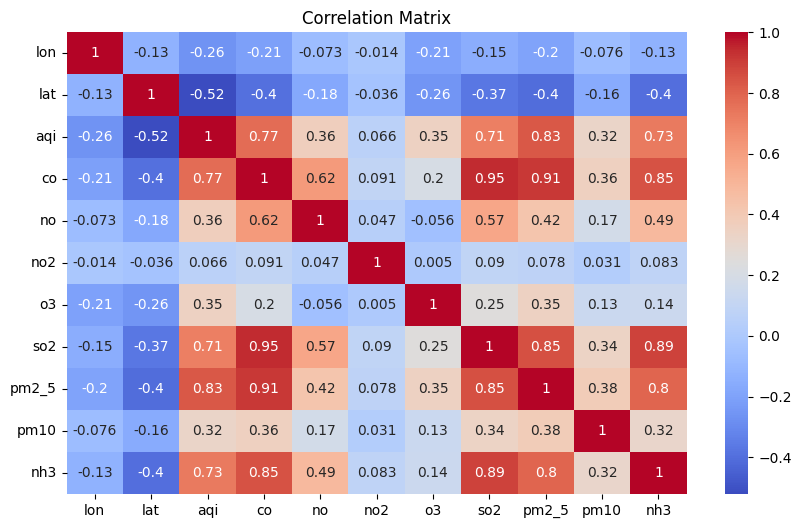

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

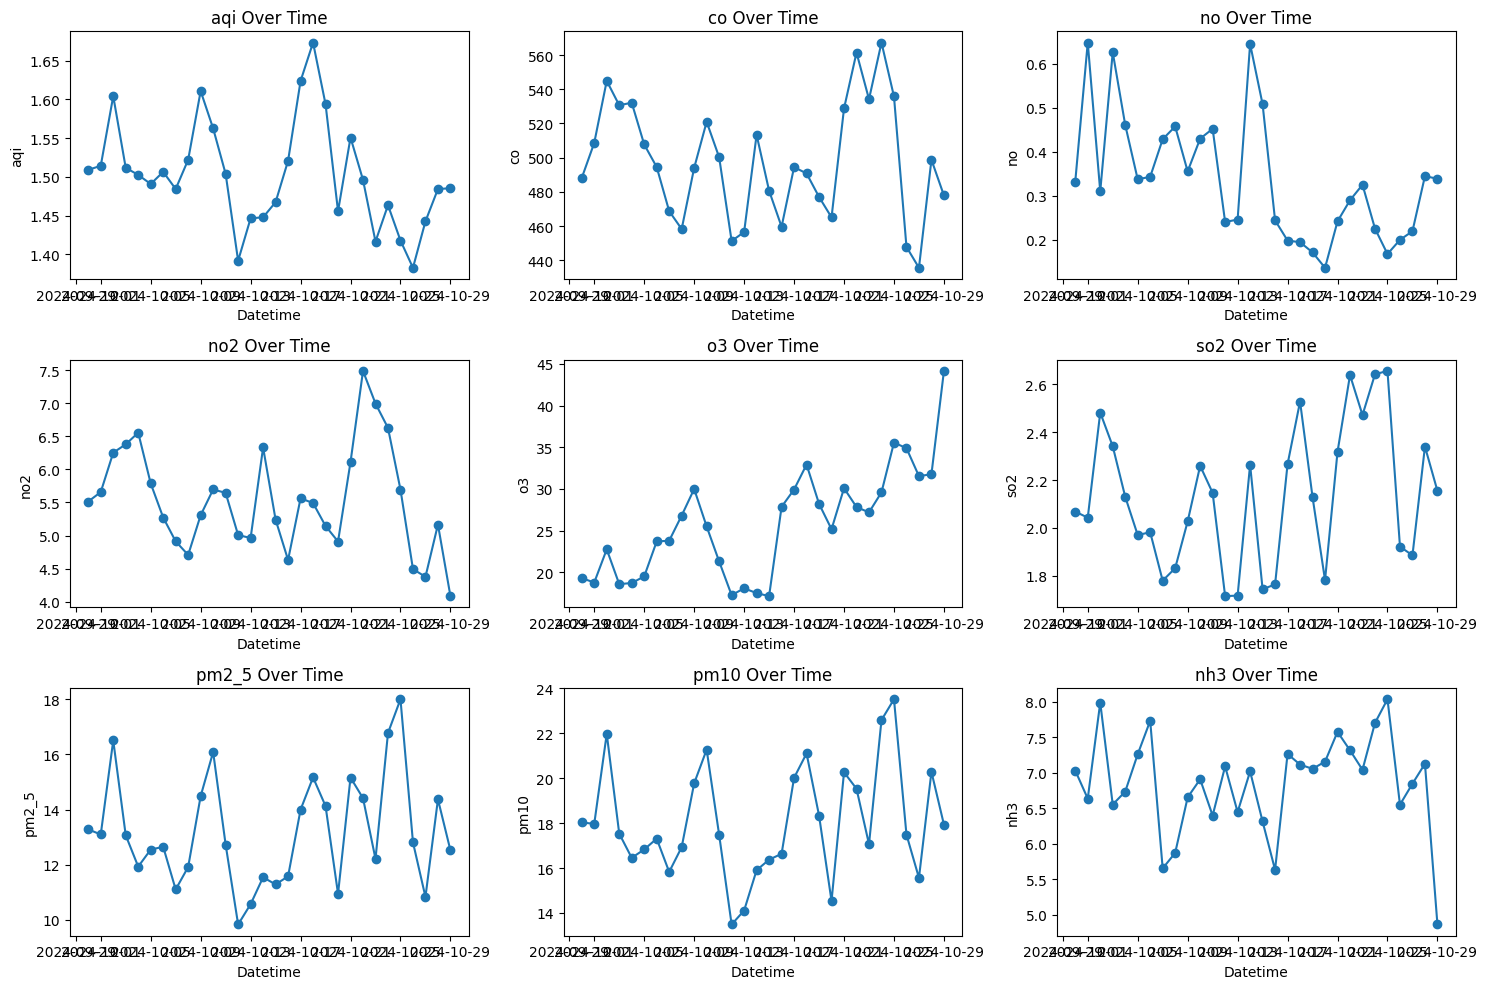

In [17]:
data_daily_sample = data.resample('D').mean()

last_30_days = data_daily_sample.tail(30)

components = ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plt.figure(figsize=(15, 10))
for i, component in enumerate(components, 1):
    plt.subplot(3, 3, i)
    plt.plot(last_30_days.index, last_30_days[component], marker='o')
    plt.title(f"{component} Over Time")
    plt.xlabel("Datetime")
    plt.ylabel(component)
plt.tight_layout()
plt.show()


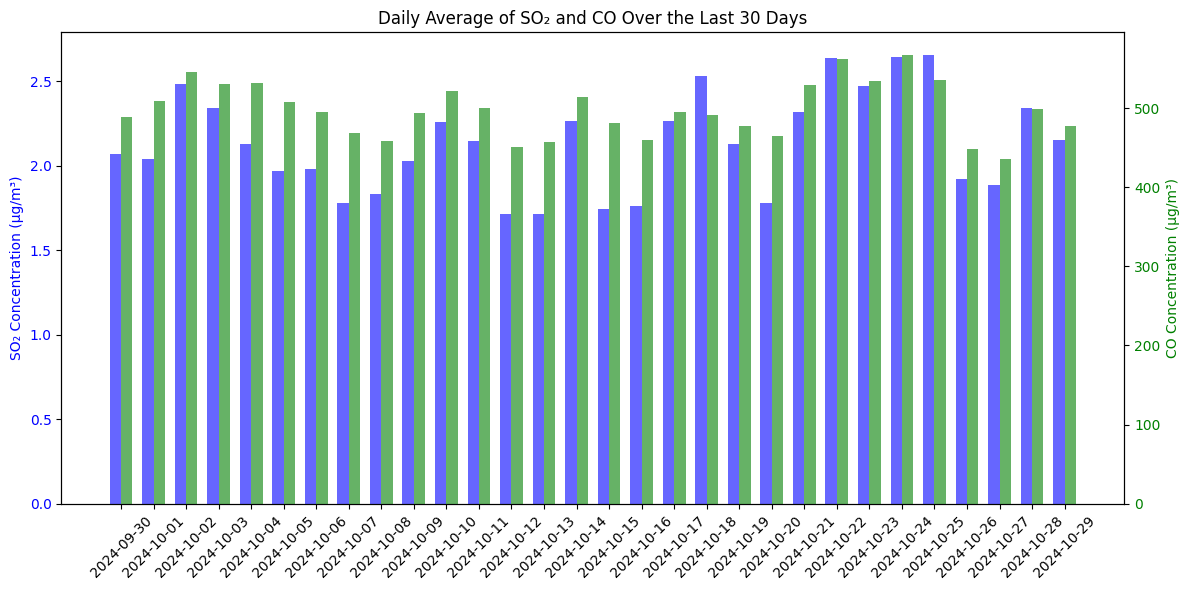

In [25]:
import matplotlib.pyplot as plt

# Prepare the data for the last 30 days
# Assuming `last_30_days` is a DataFrame with the daily averages of 'so2' and 'co'

# Create an index for the x-axis
x = range(len(last_30_days))

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for SO₂
ax1.bar(x, last_30_days['so2'], width=0.35, label='SO₂', color='blue', alpha=0.6)
ax1.set_ylabel('SO₂ Concentration (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for CO
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar([i + 0.35 for i in x], last_30_days['co'], width=0.35, label='CO', color='green', alpha=0.6)
ax2.set_ylabel('CO Concentration (µg/m³)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set x-ticks to the dates
ax1.set_xticks([i + 0.175 for i in x])  # Adjust for center alignment
ax1.set_xticklabels(last_30_days.index.strftime('%Y-%m-%d'), rotation=45)

# Labeling the plot
plt.title('Daily Average of SO₂ and CO Over the Last 30 Days')
fig.tight_layout()  # Adjust layout to fit the labels

# Show the plot
plt.show()


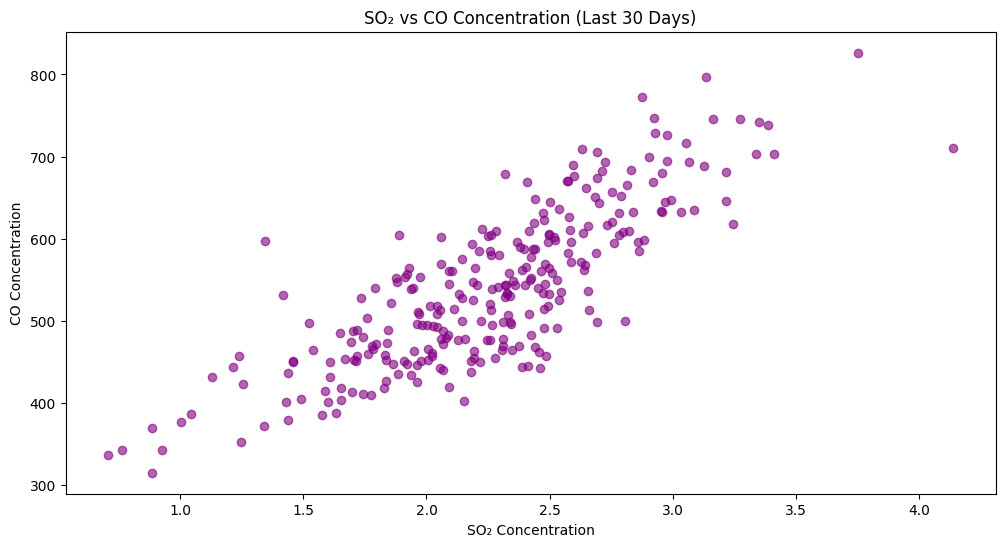

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(data_daily_sample['so2'], data_daily_sample['co'], color='purple', alpha=0.6)

plt.xlabel('SO₂ Concentration')
plt.ylabel('CO Concentration')
plt.title('SO₂ vs CO Concentration (Last 30 Days)')

plt.show()

LSTM Method

Epoch 1/100


c:\Users\Paskal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8276/8276 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.3358 - mae: 0.3326 - val_loss: 0.0360 - val_mae: 0.0974
Epoch 2/100
8276/8276 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0682 - mae: 0.1407 - val_loss: 0.0335 - val_mae: 0.0860
Epoch 3/100
8276/8276 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0650 - mae: 0.1309 - val_loss: 0.0321 - val_mae: 0.0736
Epoch 4/100
8276/8276 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0619 - mae: 0.1267 - val_loss: 0.0439 - val_mae: 0.0873
Epoch 5/100
8276/8276 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0573 - mae: 0.1209 - val_loss: 0.0318 - val_mae: 0.0984
Epoch 6/100
8276/8276 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0561 - mae: 0.1184 - val_loss: 0.0292 - val_mae: 0.0775
Epoch 7/100
8276/8276 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0538 - mae: 0.1148 - val_loss: 0.0278 - val_mae: 0.0710
Epoch 8/100
8276/8276 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0538 - mae: 0.1131 - val_loss: 0.0304 - val_mae: 0.0671
Epoch 9/100
8276/8276 ━━━━━━━━━━━━━━

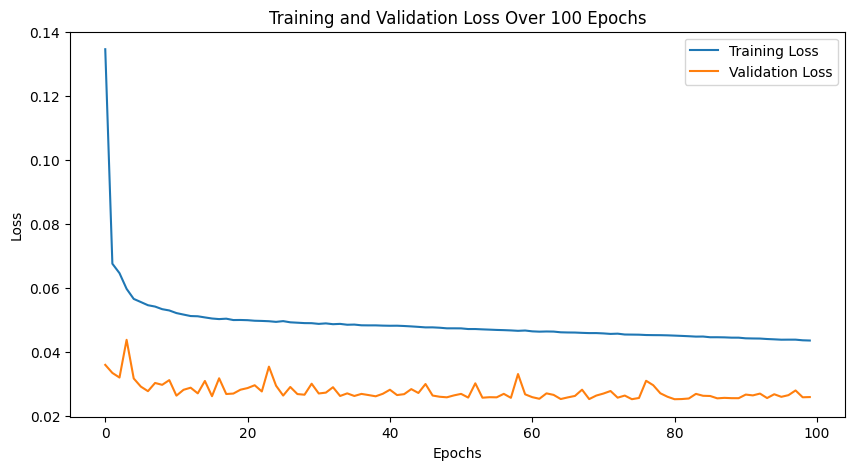

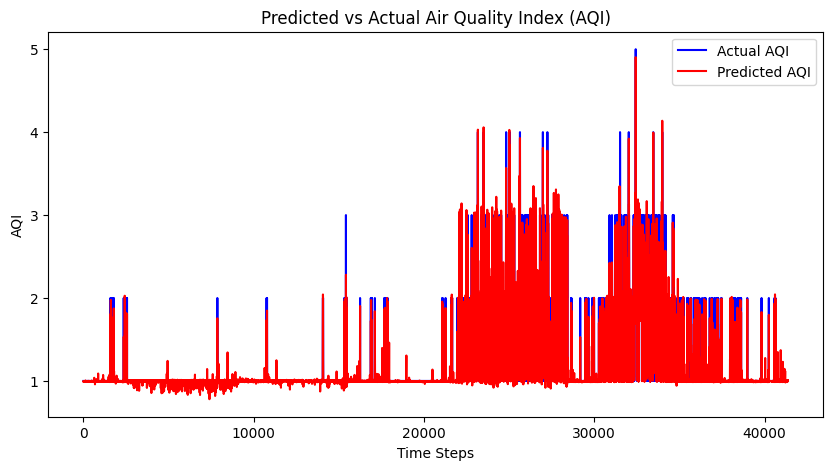

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data from 'data.csv'
data = pd.read_csv('combined_data_aqi.csv')

# Extract features and target
features = data[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].values
target = data['aqi'].values

# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape data for LSTM [samples, time steps, features]
time_steps = 1
X = []
y = []

for i in range(len(features_scaled) - time_steps):
    X.append(features_scaled[i:i + time_steps])
    y.append(target[i + time_steps])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(time_steps, X.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Set epochs to 100 and batch size
epochs = 100
batch_size = 16

# Train the model (without early stopping)
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1,
)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Check if R-squared is above 90%
if r2 >= 0.9:
    print("The LSTM model achieves above 90% accuracy and performs well.")
else:
    print("The LSTM model may need further tuning.")

# Plot Training and Validation Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Predictions vs. Actual AQI
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual AQI', color='blue')
plt.plot(predictions, label='Predicted AQI', color='red')
plt.title('Predicted vs Actual Air Quality Index (AQI)')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.show()


Linear Regression Method

MSE: 0.34018319772179284
RMSE: 0.5832522590798881
MAE: 0.3655799126897065
R-squared: 0.7261514177505003
The Linear Regression model may need further tuning.


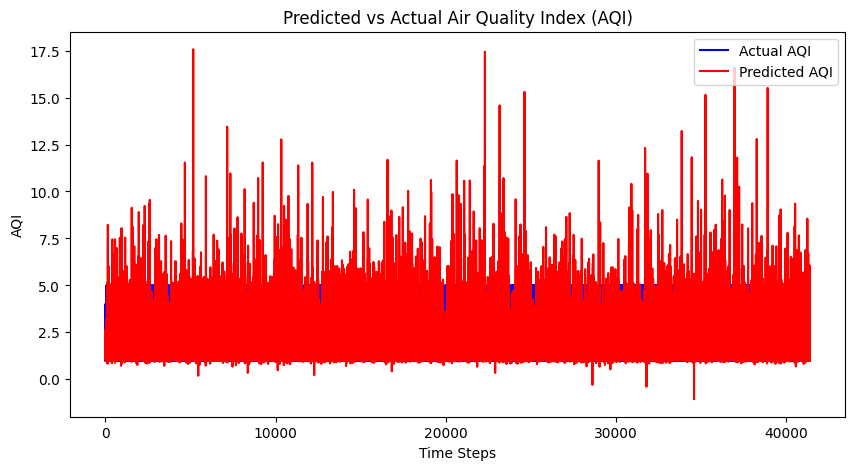

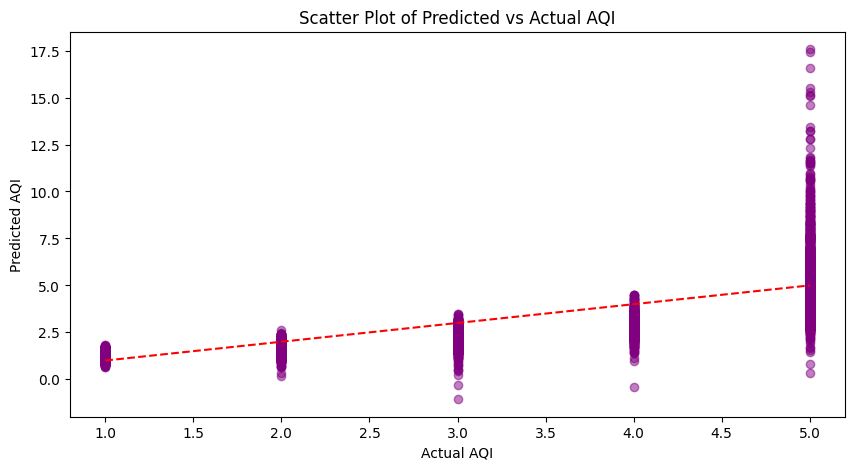

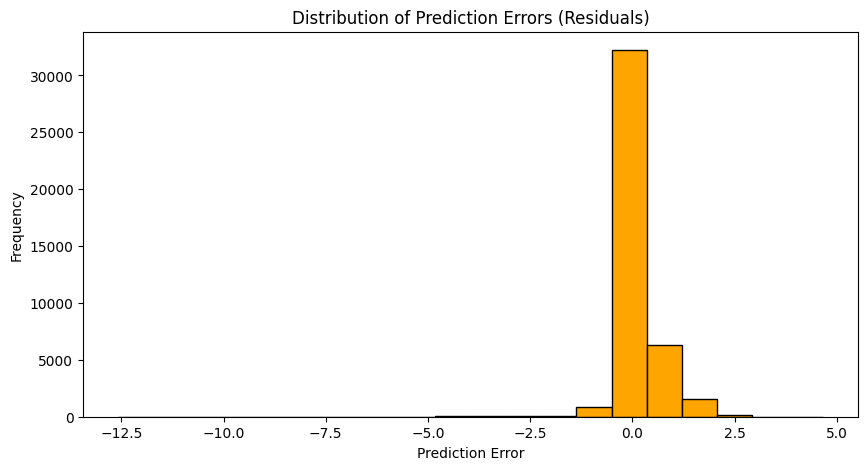

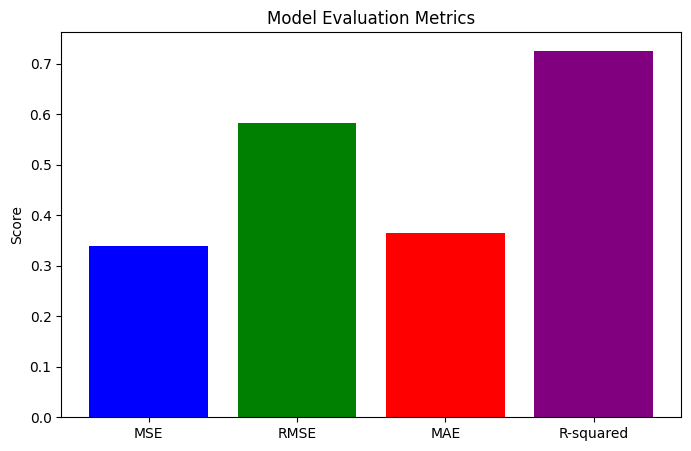

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data from 'data.csv'
data = pd.read_csv('combined_data_aqi.csv')

# Extract features and target
features = data[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].values
target = data['aqi'].values

# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the model
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Check if R-squared is above 90%
if r2 >= 0.9:
    print("The Linear Regression model achieves above 90% accuracy and performs well.")
else:
    print("The Linear Regression model may need further tuning.")

# Plot Training and Validation Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual AQI', color='blue')
plt.plot(predictions, label='Predicted AQI', color='red')
plt.title('Predicted vs Actual Air Quality Index (AQI)')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.show()

# Scatter Plot Predicted vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot of Predicted vs Actual AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

# Distribution of Residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Bar Plot for Model Evaluation Metrics
metrics = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()


Batas Atas dan Batas Bawah masing-masing polutan yang ada di dataset

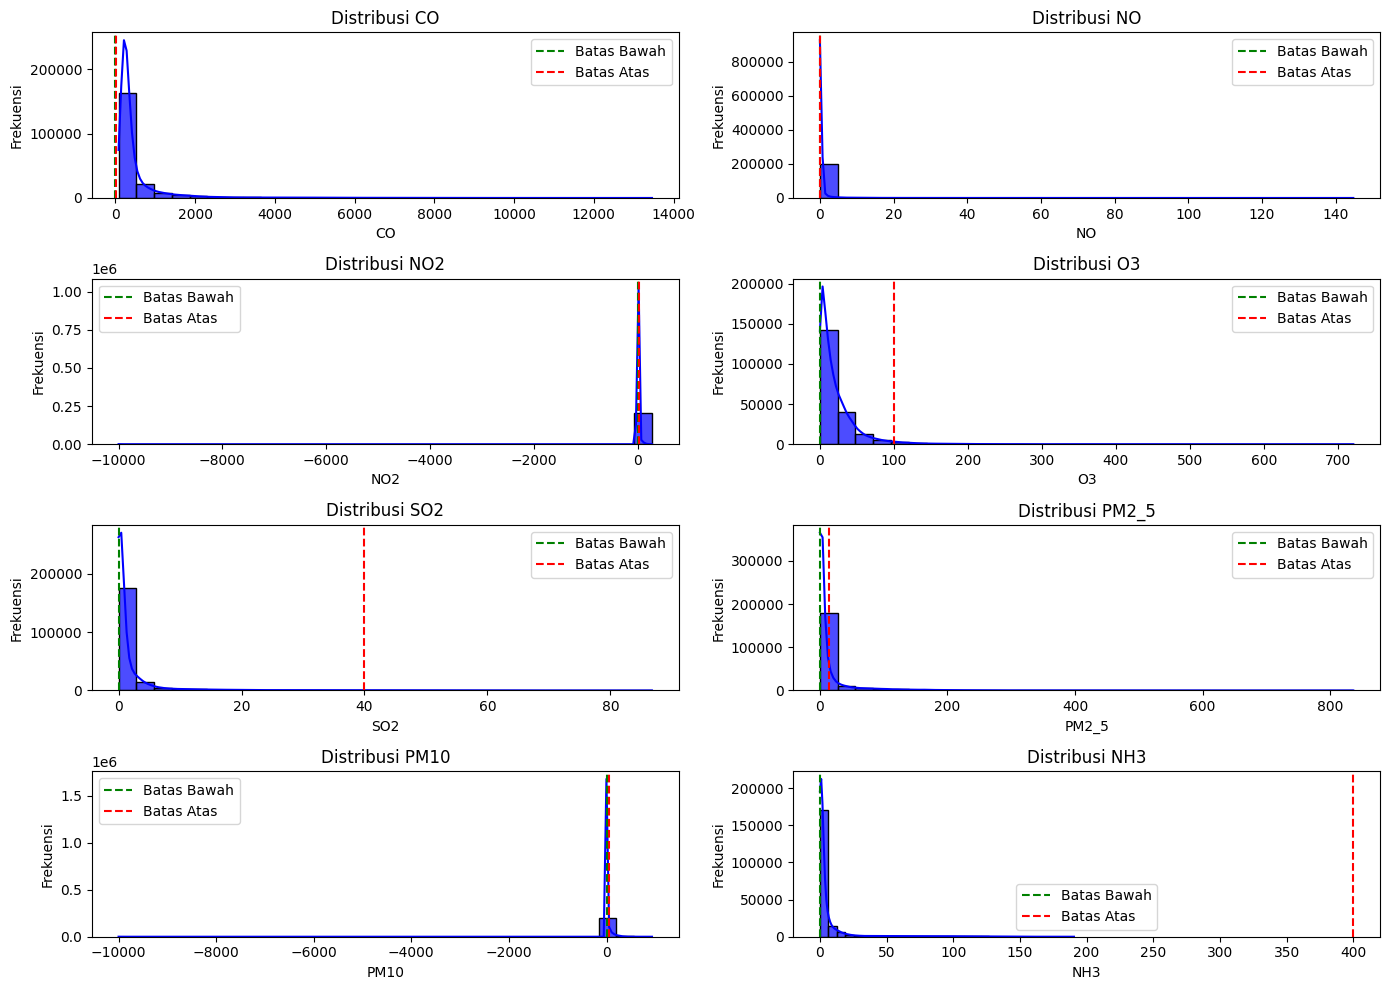

lon      0
lat      0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dt       0
dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('combined_data_aqi.csv')

# Standar kesehatan (WHO 2021 atau badan lingkungan lainnya)
thresholds = {
    "co": [0, 4],           # mg/m³
    "no": [0, 0.06],        # ppm
    "no2": [0, 25],         # µg/m³
    "o3": [0, 100],         # µg/m³
    "so2": [0, 40],         # µg/m³
    "pm2_5": [0, 15],       # µg/m³
    "pm10": [0, 45],        # µg/m³
    "nh3": [0, 400]         # µg/m³
}

# Plotting
plt.figure(figsize=(14, 10))
for i, (polutan, (lower, upper)) in enumerate(thresholds.items(), 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[polutan], bins=30, kde=True, color="blue", alpha=0.7)
    plt.axvline(lower, color="green", linestyle="--", label="Batas Bawah")
    plt.axvline(upper, color="red", linestyle="--", label="Batas Atas")
    plt.title(f"Distribusi {polutan.upper()}")
    plt.xlabel(polutan.upper())
    plt.ylabel("Frekuensi")
    plt.legend()

plt.tight_layout()
plt.show()

# Periksa apakah ada nilai kosong
print(data.isnull().sum())

# Jika ada nilai kosong, bisa diisi dengan nilai rata-rata atau median
data = data.fillna(data.mean())


Output menunjukkan bahwa tidak ada nilai kosong atau missing values di semua kolom dataset. Setiap kolom memiliki nilai 0, yang berarti data Anda bersih dalam hal missing values.

In [1]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = 'polutant.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data
data.head()


,date,co,no2,o3,so2,pm2_5,pm10
0,10/1/2024 0:00,15380.9,108.30,0.0,48.16,524.52,763.29
1,10/1/2024 1:00,14099.1,87.05,0.0,39.10,503.96,737.04
2,10/1/2024 2:00,11962.9,68.55,0.0,30.99,467.86,691.56
3,10/1/2024 3:00,10360.7,56.21,0.0,25.99,443.14,655.62
4,10/1/2024 4:00,10467.5,51.41,0.0,25.51,469.50,676.38


In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y %H:%M')

# Scale the feature data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']])

# Prepare data for LSTM: use 48 hours to predict the next hour
time_steps = 48  # Using last 48 hours as input
X, y = [], []

for i in range(len(scaled_data) - time_steps):
    X.append(scaled_data[i:i + time_steps])  # Past 48 hours as features
    y.append(scaled_data[i + time_steps])   # Next hour's data as target

X, y = np.array(X), np.array(y)

# Verify the shapes of X and y
X.shape, y.shape


((1536, 48, 6), (1536, 6))

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, X.shape[2])),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(6)  # Output layer matches the number of features (6 pollutants)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train-test split
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50


c:\Users\Paskal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0547 - mae: 0.1704 - val_loss: 0.0154 - val_mae: 0.1090
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0245 - mae: 0.1190 - val_loss: 0.0107 - val_mae: 0.0910
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0148 - mae: 0.0902 - val_loss: 0.0069 - val_mae: 0.0723
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0133 - mae: 0.0824 - val_loss: 0.0060 - val_mae: 0.0652
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0101 - mae: 0.0725 - val_loss: 0.0064 - val_mae: 0.0689
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0106 - mae: 0.0716 - val_loss: 0.0044 - val_mae: 0.0558
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0076 - mae: 0.0626 - val_loss: 0.0033 - val_mae: 0.0463
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - mae: 0.0607 - val_loss: 0.0035 - val_mae: 0.0474
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055 - mae: 0.

In [15]:
# Tampilkan 5 baris pertama dataset
print(data.head())

# Tampilkan semua nama kolom
print(data.columns)


             date       co     no2   o3    so2   pm2_5    pm10
0  10/1/2024 0:00  15380.9  108.30  0.0  48.16  524.52  763.29
1  10/1/2024 1:00  14099.1   87.05  0.0  39.10  503.96  737.04
2  10/1/2024 2:00  11962.9   68.55  0.0  30.99  467.86  691.56
3  10/1/2024 3:00  10360.7   56.21  0.0  25.99  443.14  655.62
4  10/1/2024 4:00  10467.5   51.41  0.0  25.51  469.50  676.38
Index(['date', 'co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10'], dtype='object')


In [11]:
from sklearn.metrics import mean_absolute_percentage_error

# Tambahkan epsilon kecil untuk menghindari pembagian dengan nol
epsilon = 1e-10
y_test_actual_safe = np.maximum(y_test_actual, epsilon)
y_test_predicted_safe = np.maximum(y_test_predicted, epsilon)

# Hitung MAPE dengan data aman
mape = mean_absolute_percentage_error(y_test_actual_safe, y_test_predicted_safe)
accuracy = 100 - (mape * 100)

print(f"MAPE: {mape * 100:.2f}%")
print(f"Akurasi: {accuracy:.2f}%")


MAPE: 143688203731.73%
Akurasi: -143688203631.73%


PREDIKSI BARU

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']

# Calculate metrics for each pollutant
for i, pollutant in enumerate(pollutants):
    mse = mean_squared_error(y_test[:, i], predictions[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test[:, i], predictions[:, i])
    r2 = r2_score(y_test[:, i], predictions[:, i])
    
    print(f"Metrics for {pollutant}:")
    print(f"  - Mean Squared Error (MSE): {mse:.2f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  - R-squared (R²): {r2:.2f} ({r2 * 100:.2f}%)\n")


Metrics for co:
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.04
  - Mean Absolute Error (MAE): 0.03
  - R-squared (R²): 0.93 (93.24%)

Metrics for no2:
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.05
  - Mean Absolute Error (MAE): 0.04
  - R-squared (R²): 0.88 (87.96%)

Metrics for o3:
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.02
  - Mean Absolute Error (MAE): 0.02
  - R-squared (R²): 0.61 (61.31%)

Metrics for so2:
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.04
  - Mean Absolute Error (MAE): 0.03
  - R-squared (R²): 0.85 (84.91%)

Metrics for pm2_5:
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.05
  - Mean Absolute Error (MAE): 0.03
  - R-squared (R²): 0.91 (91.39%)

Metrics for pm10:
  - Mean Squared Error (MSE): 0.00
  - Root Mean Squared Error (RMSE): 0.04
  - Mean Absolute Error (MAE): 0.03
  - R-squared (R²): 0.93 (92.86%)



Epoch 1/100


c:\Users\Paskal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0357 - mae: 0.1425 - val_loss: 0.0222 - val_mae: 0.1061
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - mae: 0.0897 - val_loss: 0.0209 - val_mae: 0.1053
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0111 - mae: 0.0765 - val_loss: 0.0139 - val_mae: 0.0842
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0083 - mae: 0.0663 - val_loss: 0.0122 - val_mae: 0.0813
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0065 - mae: 0.0572 - val_loss: 0.0093 - val_mae: 0.0697
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0060 - mae: 0.0540 - val_loss: 0.0075 - val_mae: 0.0608
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0055 - mae: 0.0499 - val_loss: 0.0080 - val_mae: 0.0623
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0044 - mae: 0.0456 - val_loss: 0.0069 - val_mae: 0.0598
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0042 -

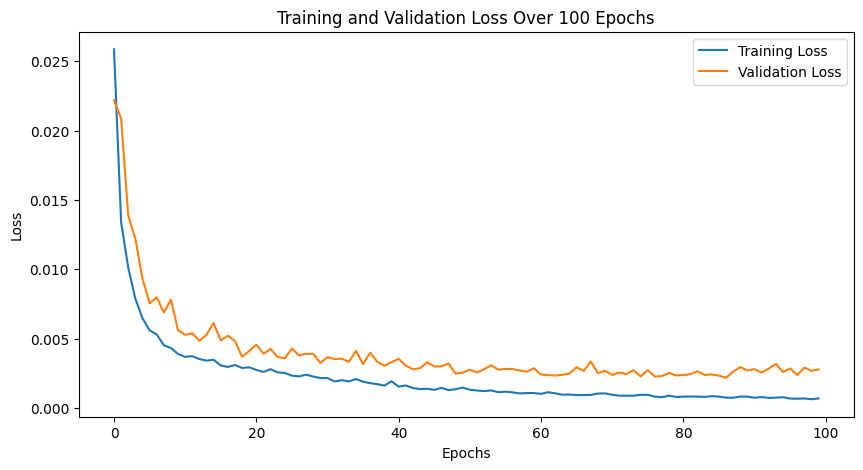

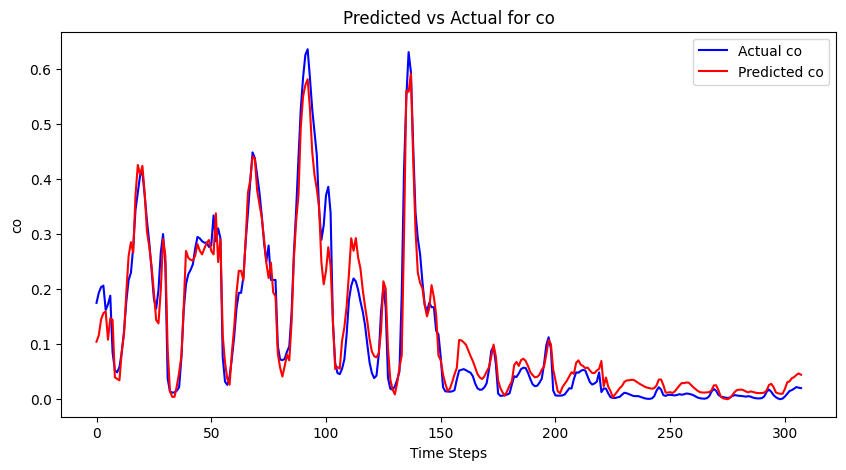

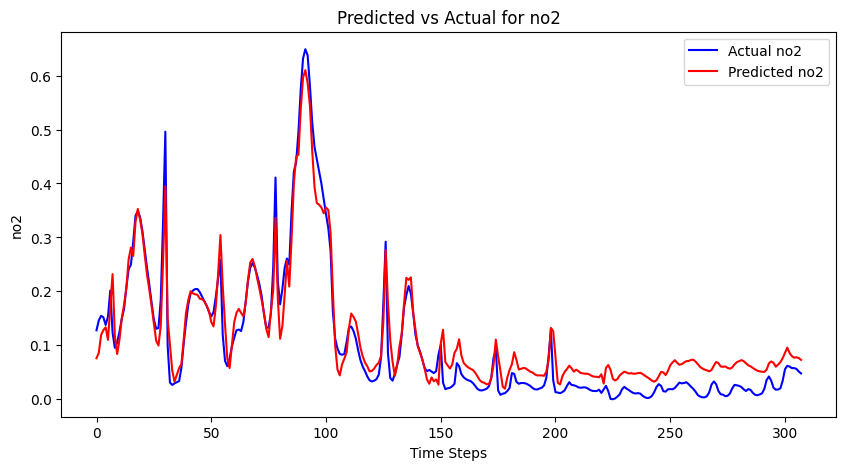

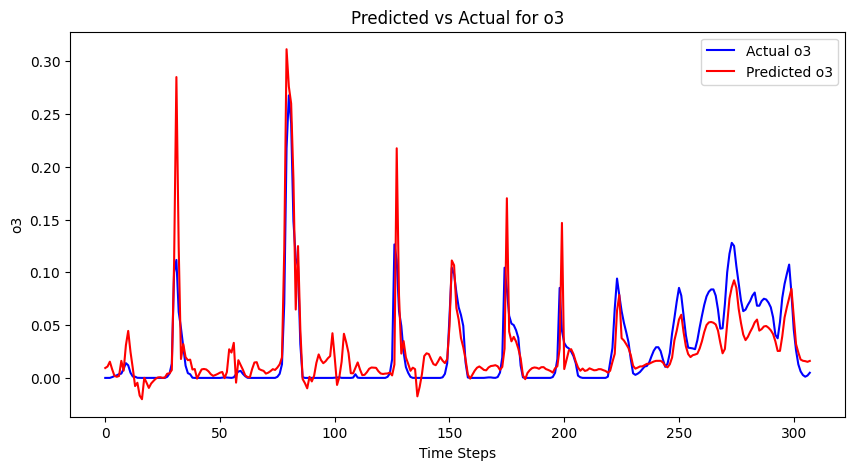

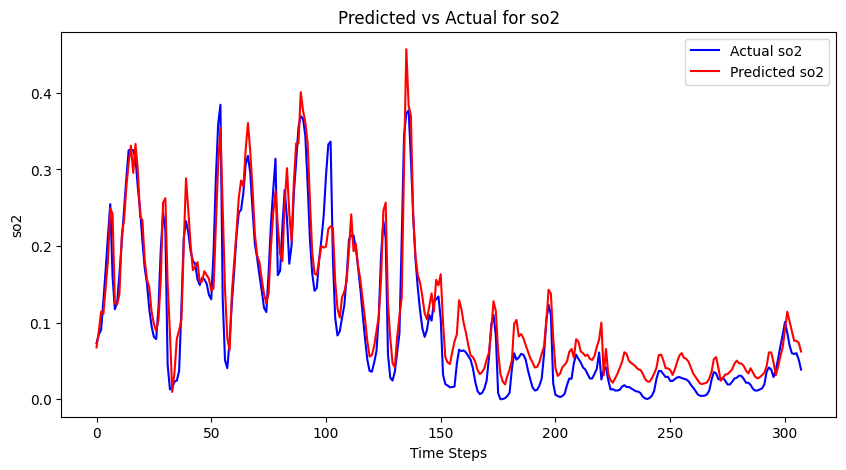

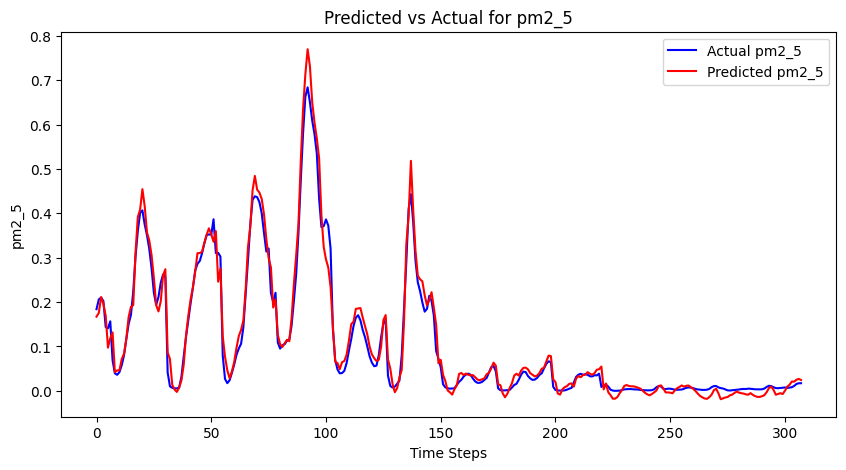

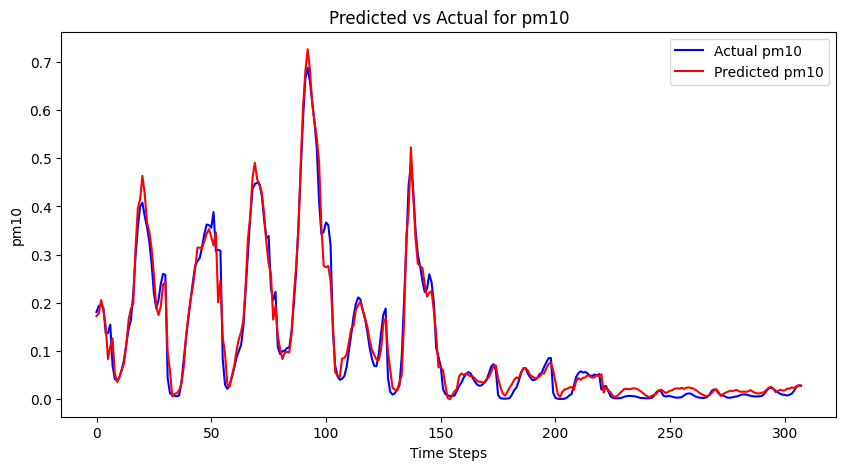

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data from 'polutant.csv'
data = pd.read_csv('polutant.csv')

# Extract features and targets (same as features for multi-output)
features = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']].values

# Scale the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape data for LSTM [samples, time steps, features]
time_steps = 48  # To predict 48 hours ahead
X = []
y = []

# Create input-output pairs
for i in range(len(features_scaled) - time_steps):
    X.append(features_scaled[i:i + time_steps])        # Past `time_steps` for input
    y.append(features_scaled[i + time_steps])         # 48th step ahead for target

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model for multi-output regression
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(time_steps, X.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(y.shape[1])  # Number of outputs matches target columns
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Set epochs to 100 and batch size
epochs = 100
batch_size = 16

# Train the model (without early stopping)
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1,
)

# Evaluate the model
predictions = model.predict(X_test)

# Calculate metrics for each output
mse = mean_squared_error(y_test, predictions, multioutput='raw_values')
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - predictions), axis=0)  # Calculate MAE manually
r2 = r2_score(y_test, predictions, multioutput='raw_values')

# Display metrics
pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']
for i, pollutant in enumerate(pollutants):
    print(f"Metrics for {pollutant}:")
    print(f"  - MSE: {mse[i]:.4f}")
    print(f"  - RMSE: {rmse[i]:.4f}")
    print(f"  - MAE: {mae[i]:.4f}")  # Corrected to use the manually calculated MAE
    print(f"  - R-squared: {r2[i]:.4f}")

# Check if R-squared is above 90% for all outputs
if all(r >= 0.9 for r in r2):
    print("\nThe LSTM model achieves above 90% accuracy for all outputs and performs well.")
else:
    print("\nThe LSTM model may need further tuning.")

# Plot Training and Validation Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Predictions vs. Actual for each pollutant
for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:, i], label=f'Actual {pollutant}', color='blue')
    plt.plot(predictions[:, i], label=f'Predicted {pollutant}', color='red')
    plt.title(f'Predicted vs Actual for {pollutant}')
    plt.xlabel('Time Steps')
    plt.ylabel(pollutant)
    plt.legend()
    plt.show()


In [10]:
# Menghitung akurasi rata-rata sebagai persentase
accuracy_per_output = r2 * 100  # R-squared to percentage
average_accuracy = np.mean(accuracy_per_output)

# Menampilkan akurasi untuk setiap output
for i, pollutant in enumerate(['CO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10']):
    print(f"Accuracy for {pollutant}: {accuracy_per_output[i]:.2f}%")

# Menampilkan rata-rata akurasi
print(f"Average model accuracy: {average_accuracy:.2f}%")


Accuracy for CO: 95.09%
Accuracy for NO2: 91.99%
Accuracy for O3: 65.75%
Accuracy for SO2: 89.64%
Accuracy for PM2.5: 97.33%
Accuracy for PM10: 97.57%
Average model accuracy: 89.56%


In [9]:
import pandas as pd
from datetime import datetime, timedelta

# Prediksi 48 jam ke depan
future_steps = 48
future_predictions = []

# Menggunakan data terakhir dari X_test untuk memulai prediksi
current_input = X_test[-1]

for _ in range(future_steps):
    # Prediksi berdasarkan input saat ini
    predicted = model.predict(current_input[np.newaxis, :, :])[0]
    future_predictions.append(predicted)

    # Perbarui input untuk prediksi berikutnya
    current_input = np.roll(current_input, -1, axis=0)
    current_input[-1] = predicted  # Masukkan prediksi sebagai input berikutnya

# Invers transform data prediksi
future_predictions = scaler.inverse_transform(future_predictions)

# Membuat kolom tanggal mulai dari waktu sekarang
start_date = datetime(2024, 10, 1, 0, 0)  # Contoh tanggal mulai
dates = [start_date + timedelta(hours=i) for i in range(future_steps)]

# Membuat DataFrame
output_df = pd.DataFrame(
    future_predictions,
    columns=['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']
)
output_df.insert(0, 'date', dates)

# Simpan ke file CSV
output_csv_path = 'future_predictions.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"File hasil prediksi telah disimpan sebagai '{output_csv_path}'.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━